# Project 4: SVM and K-means

UIC CS 412, Spring 2018

_If you have discussed this assignment with anyone, please state their name(s) here: [NAMES]. Keep in mind the expectations set in the Academic Honesty part of the syllabus._

There are two parts to this project. The first is on SVM. The second is on k-means. 

This assignment is adapted from the github materials for 
[A Course in Machine Learning](https://github.com/hal3/ciml).

## Due Date

This assignment is due at 11:59pm Tuesday, April 10th. 

### Files You'll Edit

``clustering.py``: 

### Files you might want to look at
  
``svm-train.py``: .

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``drawBoundary.py``: 
    
``data/*``: All of the datasets we'll use.

### What to Submit

You will hand in all of the python files listed above as a single zip file **h4.zip** on 
Gradescope under *Homework 4*.  The programming part constitutes 20% of the grade for this 
homework. You also need to answer the questions denoted by **WU#** (and a kitten) in this 
notebook which are the other 80% of your homework grade. When you are done, you should 
export **hw4.ipynb** with your answers as a PDF file **hw4WrittenPart.pdf**, upload the 
PDF file to Gradescope under *Homework 4 - Written Part*, and tag each question on Gradescope. 

Your entire homework will be considered late if any of these parts are submitted late. 

#### Autograding

Your code will be autograded for technical correctness. Please **do
not** change the names of any provided functions or classes within the
code, or you will wreak havoc on the autograder. We have provided two simple test cases that you can try your code on, see ``run_tests_simple.py``. As usual, you should create more test cases to make sure your code runs correctly.

# Part 1: SVM [50%]

Here, we'll play around with SVMs and kernels to get a sense of what they are actually doing. We will use sklearn's SVC library for it.

Let's start by training a simple linear SVM:

In [1]:
import svmtrain, drawBoundary, importlib
importlib.reload(svmtrain)

model = svmtrain.SVMWrapper(['-t', '0', '-c', 100, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['linear'], 'gamma': ['1.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['3'], 'rho': ['1.0560455620433609'], 'label': ['-1', '1'], 'nr_sv': ['2', '1']}
[ 27.05295617  17.40551799 -44.45847416]
[[ 0.01020408 -0.25510204]
 [-0.35714286 -0.05102041]
 [-0.03061224  0.01020408]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


<Figure size 640x480 with 1 Axes>

This invocation of svm-train says:

    -t 0    -- use a linear kernel
    -c 100  -- set "C" = 100, which means "overfit a lot"

This is an easily separable dataset, which is reflected by the small
number of support vectors. In the plot, the SVs are drawn big (and are
on the margin, the dashed line one unit away from the decision
boundary, the solid line).

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU1 (10%):

You should have found that it takes 3 support
vectors. Could you have fewer (eg., 2) support vectors here?

[your WU1 answer here] Yes, logically we can have fewer support vectors such as 2 but this dataset doesn't give less than 3 support vectors.

Although it's unnecessary, we can also train a polynomial SVM with
degree 10 (for instance), with:

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['poly'], 'gamma': ['1.0'], 'degree': ['10.0'], 'coef0': ['1.0'], 'nr_class': ['2'], 'total_sv': ['4'], 'rho': ['1.0022942741858363'], 'label': ['-1', '1'], 'nr_sv': ['2', '2']}
[ 1.99871327  0.99432572 -2.86996698 -0.12307201]
[[ 0.01020408 -0.25510204]
 [-0.35714286 -0.05102041]
 [-0.03061224  0.01020408]
 [-0.37755102  0.25510204]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=10.0, gamma=1.0, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


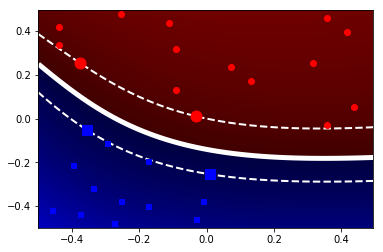

In [14]:
model = svmtrain.SVMWrapper(['-t', '1', '-r', '1', '-d', 10, '-c', 100, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

This says:

    -t 1      -- use a polynomial kernel
    -r 1      -- use (1 + u*v)^degree, where "r" is the "1"
    -d 10     -- tenth degree

You'll see that you get a curved decision boundary, though of course
this is somewhat overkill.

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['1.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['4'], 'rho': ['-0.5821953218575648'], 'label': ['-1', '1'], 'nr_sv': ['2', '2']}
[ 11.80307156  10.79578114 -20.3763535   -2.2224992 ]
[[ 0.01020408 -0.25510204]
 [-0.35714286 -0.05102041]
 [-0.03061224  0.01020408]
 [-0.37755102  0.25510204]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


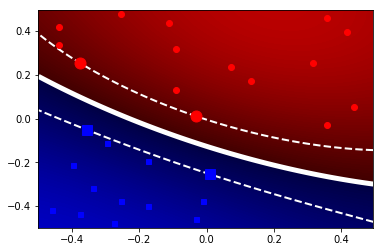

In [15]:
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

(Here, `-t 2` means RBF and `-g 1` means gamma=1)

Again, this is overkill. But we can try to understand RBF kernels a
bit better by "turning up" the gamma:

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['100.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['28'], 'rho': ['0.16680290024000682'], 'label': ['-1', '1'], 'nr_sv': ['13', '15']}
[ 0.82285155  0.84752243  0.28594756  0.94169804  0.77022762  0.18419132
  0.47536808  0.67229685  1.02615978  0.86704195  1.04815592  0.52140238
  0.8643894  -0.6598347  -0.72704879 -0.65666199 -0.68312134 -0.56444841
 -0.52222811 -0.71579707 -0.78802644 -0.65636273 -0.23878393 -0.52615593
 -0.6586009  -0.61031031 -0.57434495 -0.74552726]
[[-0.2755102  -0.47959184]
 [-0.03061224 -0.45918367]
 [-0.37755102 -0.43877551]
 [-0.45918367 -0.41836735]
 [-0.17346939 -0.39795918]
 [-0.25510204 -0.37755102]
 [-0.01020408 -0.37755102]
 [-0.33673469 -0.31632653]
 [ 0.01020408 -0.25510204]
 [-0.39795918 -0.21428571]
 [-0.17346939 -0.19387755]
 [-0.29591837 -0.1122449 ]
 [-0.35714286 -0.05102041]
 [ 0.35714286 -0.03061224]
 [-0.03061224  0.01020408

fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


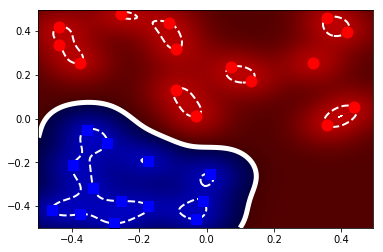

In [17]:
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, '-g', 100, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

A gamma of 100 means that you have to be *really* close to a point to
have a kernel value that's non-zero.

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU2 (10%):
Why do you get these little blobs? How high do you have
   to turn gamma up in order to get a little decision boundary around
   each example?

training model data0 -> data0.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['1900.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['28'], 'rho': ['0.07142865474097826'], 'label': ['-1', '1'], 'nr_sv': ['13', '15']}
[ 1.07128915  1.07128761  1.0722641   1.07128763  1.07128761  1.07128761
  1.07128763  1.07226563  1.07128915  1.07128917  1.07128915  1.07128846
  1.07128845 -0.92871083 -0.92871085 -0.92871085 -0.92871085 -0.92871024
 -0.92871022 -0.92871085 -0.92871083 -0.92871083 -0.92870789 -0.92773376
 -0.92773143 -0.92871085 -0.92871024 -0.92871085]
[[-0.2755102  -0.47959184]
 [-0.03061224 -0.45918367]
 [-0.37755102 -0.43877551]
 [-0.45918367 -0.41836735]
 [-0.17346939 -0.39795918]
 [-0.25510204 -0.37755102]
 [-0.01020408 -0.37755102]
 [-0.33673469 -0.31632653]
 [ 0.01020408 -0.25510204]
 [-0.39795918 -0.21428571]
 [-0.17346939 -0.19387755]
 [-0.29591837 -0.1122449 ]
 [-0.35714286 -0.05102041]
 [ 0.35714286 -0.03061224]
 [-0.03061224  0.0102040

fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1900.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


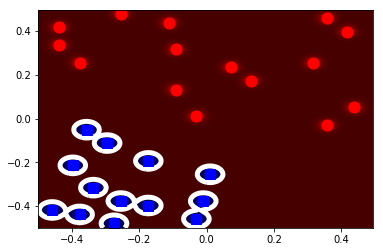

In [25]:
#[WU2 code here]:
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, '-g', 1900, 'data0', 'data0.model'])
model.train()
c = drawBoundary.Boundary('data0')
c.draw()

[your WU2 answer here]: 

Since the value of gamma is high, RBF kernel radial effect decreases significantly more with distance and because of this it makes small clusters only, which gives the effects of little blobs. High value of gamma means the model is overfitting. 

On turning gamma value around 1900 makes decision boundary around each example.

Let's now switch to a more complex dataset. We'll begin by failing
with a linear model:

training model data1 -> data1.model
{'svm_type': ['c_svc'], 'kernel_type': ['linear'], 'gamma': ['1.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['30'], 'rho': ['-0.14277916662864718'], 'label': ['-1', '1'], 'nr_sv': ['15', '15']}
[ 1000.          1000.          1000.          1000.
  1000.          1000.          1000.          1000.
  1000.          1000.          1000.           754.16143908
  1000.          1000.           310.8323852    -64.99382429
 -1000.         -1000.         -1000.         -1000.
 -1000.         -1000.         -1000.         -1000.
 -1000.         -1000.         -1000.         -1000.
 -1000.         -1000.        ]
[[-0.37755102 -0.47959184]
 [-0.45918367 -0.41836735]
 [-0.45918367 -0.33673469]
 [-0.37755102 -0.2755102 ]
 [ 0.39795918 -0.23469388]
 [-0.31632653 -0.21428571]
 [ 0.45918367 -0.13265306]
 [-0.29591837 -0.09183673]
 [ 0.33673469 -0.03061224]
 [ 0.31632653  0.09183673]
 [ 0.21428571  0.19387755]
 [-0.05102041  0.25510204]


fit model:SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


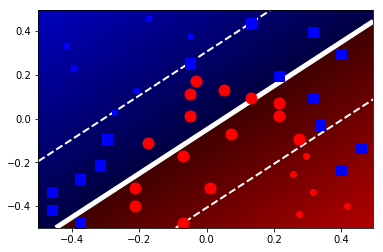

In [55]:
model = svmtrain.SVMWrapper(['-t', '0', '-c', 1000, 'data1', 'data1.model'])
model.train()
c = drawBoundary.Boundary('data1')
c.draw()

As you can see, this data fails horribly.

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU3 (10%): 
There are a lot of red support vectors on the blue side
   of the decision boundary. Why?

[your WU3 answer here] Here the data is not linearly separable and we are trying to separate it using linear kernel only which resulted in more number of misclassified examples. Since all misclassified examples becomes support vectors as these play significant role in the decision boundary. Hence, we can see lot of red support vectors on the blue side of the decision boundary.

However, now we can get some mileage out of polynomial kernels:

training model data1 -> data1.model
{'svm_type': ['c_svc'], 'kernel_type': ['poly'], 'gamma': ['1.0'], 'degree': ['3.0'], 'coef0': ['1.0'], 'nr_class': ['2'], 'total_sv': ['12'], 'rho': ['2.2211163504019455'], 'label': ['-1', '1'], 'nr_sv': ['6', '6']}
[ 100.           25.53617224  100.           13.25821994   51.52745021
  100.          -62.0994248    -9.32618275 -100.         -100.
  -18.89623484 -100.        ]
[[ 0.39795918 -0.23469388]
 [-0.31632653 -0.21428571]
 [ 0.33673469 -0.03061224]
 [-0.21428571  0.13265306]
 [ 0.21428571  0.19387755]
 [-0.05102041  0.25510204]
 [ 0.41836735 -0.39795918]
 [ 0.2755102  -0.09183673]
 [ 0.21428571  0.01020408]
 [ 0.21428571  0.07142857]
 [ 0.05102041  0.13265306]
 [-0.03061224  0.17346939]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3.0, gamma=1.0, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


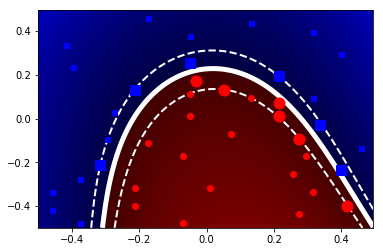

In [27]:
model = svmtrain.SVMWrapper(['-t', '1', '-r', '1', '-d', 3, '-c', 100, 'data1', 'data1.model'])
model.train()
c = drawBoundary.Boundary('data1')
c.draw()

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU4 (10%):
Based on this data, is the 0/1 loss on the training
   data zero? Is the hinge loss on the training data zero?

In [56]:
# [WU4 answer code]:
import svmtrain, drawBoundary, importlib
from sklearn.svm import SVC
from sklearn.metrics import *
import numpy as np

def loadData(filename):
    X = []
    Y = []
    with open(filename, 'r') as h:
        for l in h.readlines():
            a = l.strip().split()
            Y.append(float(a[0]))
            X.append([float(i.split(':', 1)[1]) for i in a[1:]])
    return np.array(X),np.array(Y)

X1,Y1 = loadData('data1')
#X0,Y0 = loadData('data0')
#clf = svm.LinearSVC(random_state=0)

clf = SVC(C=100.0, kernel='poly', degree=3, gamma = 1,coef0=1.0)
model = clf.fit(X1, Y1)
#pred_decision = clf.decision_function(X1)
#print(pred_decision)
hingeLoss = hinge_loss(Y1, model.predict(X1))
zero_one_loss = zero_one_loss(Y1, model.predict(X1))
print("hinge_loss: ",hingeLoss)
print("zero_one_loss:",zero_one_loss)

hinge_loss:  0.0
zero_one_loss: 0.0


[your WU4 answer here]: Hinge loss and Zero one loss on this data is coming as zero as we can see from the above result.

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU5 (10%):
Train an RBF kernel on this data. What's the smallest
   gamma for which you can get a good decision boundary?

training model data1 -> data1.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['1.1'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['11'], 'rho': ['-8.336246248426097'], 'label': ['-1', '1'], 'nr_sv': ['6', '5']}
[ 100.           32.08941209  100.           18.80350075   64.18361785
  100.          -84.80938571  -61.85973347 -100.          -68.40741151
 -100.        ]
[[ 0.39795918 -0.23469388]
 [-0.29591837 -0.09183673]
 [ 0.33673469 -0.03061224]
 [-0.21428571  0.13265306]
 [ 0.21428571  0.19387755]
 [-0.05102041  0.25510204]
 [ 0.41836735 -0.39795918]
 [ 0.21428571  0.01020408]
 [ 0.21428571  0.07142857]
 [ 0.05102041  0.13265306]
 [-0.03061224  0.17346939]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


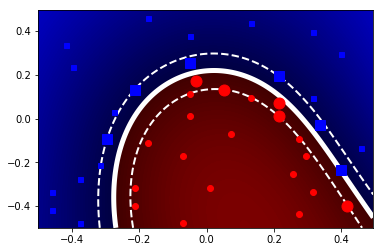

In [57]:
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, '-g', 1.1, 'data1', 'data1.model'])
model.train()
c = drawBoundary.Boundary('data1')
c.draw()


training model data1 -> data1.model
{'svm_type': ['c_svc'], 'kernel_type': ['rbf'], 'gamma': ['2.0'], 'degree': ['3'], 'coef0': ['0.0'], 'nr_class': ['2'], 'total_sv': ['9'], 'rho': ['-5.7281120751245'], 'label': ['-1', '1'], 'nr_sv': ['5', '4']}
[ 100.           22.357891     13.46120565   55.21578779   82.59418512
   -2.67800649  -70.95106307 -100.         -100.        ]
[[ 0.39795918 -0.23469388]
 [-0.29591837 -0.09183673]
 [ 0.33673469 -0.03061224]
 [ 0.21428571  0.19387755]
 [-0.05102041  0.25510204]
 [-0.21428571 -0.39795918]
 [ 0.41836735 -0.39795918]
 [ 0.21428571  0.07142857]
 [-0.03061224  0.17346939]]


fit model:SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


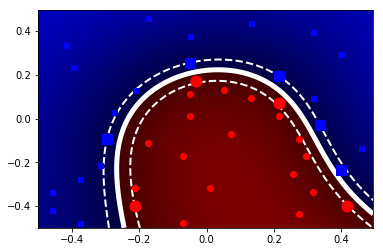

In [58]:
model = svmtrain.SVMWrapper(['-t', '2', '-c', 100, '-g', 2, 'data1', 'data1.model'])
model.train()
c = drawBoundary.Boundary('data1')
c.draw()

[your WU5 answer here]: 

On training above data with rbf kernel, smallest gamma value with which we can get a good decision boundary which means there should not be any misclassification is 1.1 since with this value loss is minimum. Although it seems that it is touching the decision boundary, it is not because the support vectors are represented here as big dots and big sqaures and because of its size it seems that it touches the boundary. With gamma value as 2, one support vector still touches the boundary and no misclassification.
So, 1.1 can be considered as least gamma value in this case which doesn't give any misclassification error and gives good decision boundary.


# Part 2: K-means [20% implementation, 30% written part]

Your second task is to implement the largest distance heuristic for
kmeans clustering in `clustering.py`.

We'll now quickly run through some basic experiments k-means:

Iteration 0, objective=1.914842509553385


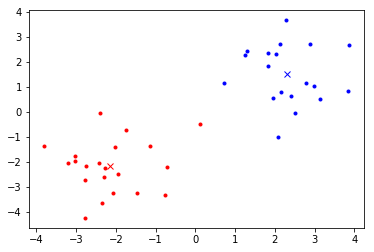

Iteration 1, objective=1.914842509553385


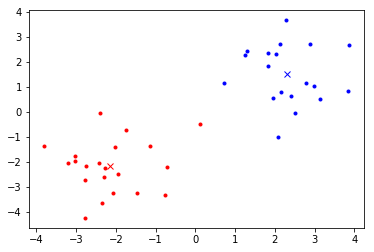

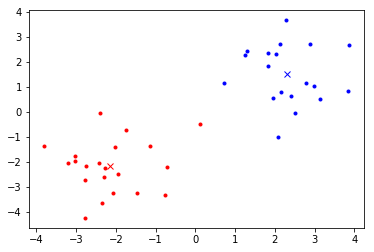

[[ 2.31287961  1.51333813]
 [-2.13455999 -2.15661017]]
[0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 1]
[1.91484251 1.91484251]


In [2]:
import clustering, datasets

mu0 = clustering.initialize_clusters(datasets.X2d, 2, 'determ')
(mu,z,obj) = clustering.kmeans(datasets.X2d, mu0)
print(mu)
#array([[ 2.31287961,  1.51333813],
#       [-2.13455999, -2.15661017]])
print(z)
#array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
#       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1])
print(obj)
#array([ 1.91484251,  1.91484251])

**Hint:** While running, this will plot the results.  If you want
to turn that off, comment out the obvious line in the `kmeans`
function.  

You can also play with another example:

Iteration 0, objective=5.845742328111946


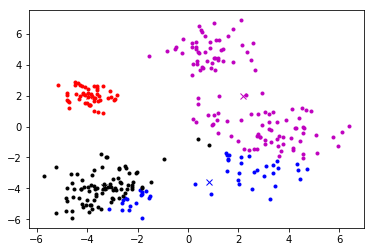

Iteration 1, objective=4.379704448165534


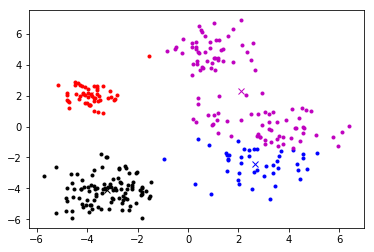

Iteration 2, objective=3.0693781383567345


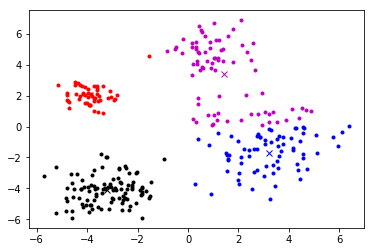

Iteration 3, objective=2.452183737921355


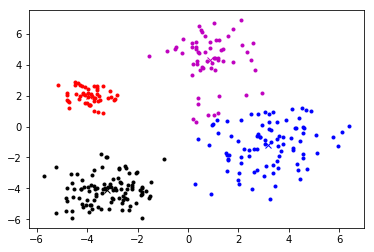

Iteration 4, objective=2.3479513734792916


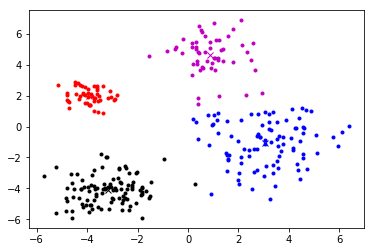

Iteration 5, objective=2.3479513734792916


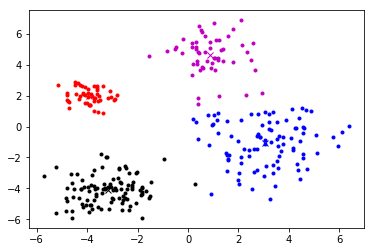

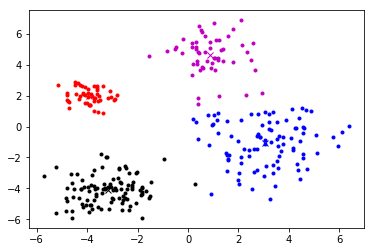

[[ 3.06150611 -1.07977065]
 [-3.92433223  1.99052827]
 [ 0.87252863  4.63384851]
 [-3.17087245 -4.10528255]]
[3 1 2 3 0 1 1 2 2 0 3 0 0 0 2 3 3 3 0 0 1 0 0 0 2 2 0 0 0 1 0 3 3 2 2 2 1
 1 3 0 3 0 0 3 1 3 3 2 1 0 1 1 3 2 3 3 0 0 3 2 0 3 1 3 0 3 2 3 3 3 3 3 0 1
 0 3 0 0 1 2 3 2 2 3 3 1 2 0 0 2 3 0 1 3 0 2 3 3 3 3 2 2 3 1 0 3 0 0 0 0 0
 1 1 2 0 1 0 2 3 1 3 0 1 1 3 0 0 1 0 3 3 1 0 0 3 0 2 2 1 0 2 3 3 3 0 3 2 3
 1 1 0 2 1 3 3 0 2 0 2 0 1 2 3 1 0 3 0 3 3 2 2 0 0 0 0 0 2 0 3 0 0 2 3 0 0
 0 2 3 2 0 2 0 0 3 0 2 0 1 2 3 3 0 3 3 2 3 1 0 0 0 0 3 0 0 1 0 3 0 1 2 3 2
 3 3 1 3 3 3 1 3 0 3 2 0 2 3 2 3 3 1 3 3 3 3 2 3 0 2 2 0 0 2 1 2 3 1 3 1 3
 1 3 0 1 3 3 0 3 0 1 3 3 1 2 3 0 2 3 0 0 3 3 1 2 3 0 3 3 1 1 1 2 0 3 0 3 1
 0 3 3 0]
[5.84574233 4.37970445 3.06937814 2.45218374 2.34795137 2.34795137]


In [3]:
mu0 = clustering.initialize_clusters(datasets.X2d2, 4, 'determ')
(mu,z,obj) = clustering.kmeans(datasets.X2d2, mu0)
#Iteration 0, objective=5.84574
#Iteration 1, objective=4.3797
#Iteration 2, objective=3.06938
#Iteration 3, objective=2.45218
#Iteration 4, objective=2.34795
#Iteration 5, objective=2.34795
print(mu)
#array([[ 3.06150611, -1.07977065],
#       [-3.92433223,  1.99052827],
#       [ 0.87252863,  4.63384851],
#       [-3.17087245, -4.10528255]])
print(z)
# a large array
print(obj)
# array([ 5.84574233,  4.37970445,  3.06937814,  2.45218374,  2.34795137,
#        2.34795137])

Once you've implemented the furthest first heuristic, you can do a test by:

Iteration 0, objective=0.49905555193625567
Iteration 1, objective=0.4673057032395777
Iteration 2, objective=0.45363838824318514
Iteration 3, objective=0.44875816922890105
Iteration 4, objective=0.44468355610225957
Iteration 5, objective=0.44270114529388954
Iteration 6, objective=0.44041187232757467
Iteration 7, objective=0.43872452524619726
Iteration 8, objective=0.43797814496346327
Iteration 9, objective=0.4376553683873654
Iteration 10, objective=0.437362561769862
Iteration 11, objective=0.4371642587898381
Iteration 12, objective=0.4370161610899472
Iteration 13, objective=0.4368553414333362
Iteration 14, objective=0.4368178710866707
Iteration 15, objective=0.4368178710866707


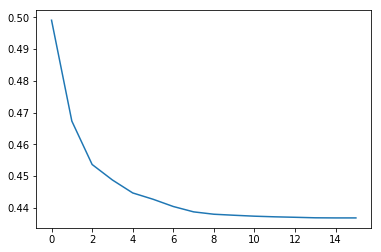

In [4]:
import util
importlib.reload(clustering)
from pylab import *

(X,Y) = datasets.loadDigits()
mu0 = clustering.initialize_clusters(X, 10, 'random')
(mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
plot(obj)
show(block=False)
# util.drawDigits(mu, arange(10))

This may take a few seconds to run. 

Note: it's very hard to provide test cases for this because of
randomness and python (unfortunately) doesn't guarantee cross-platform
randomness to be the same. Here's one thing we can do; hopefully it's
somewhat useful.

In [5]:
importlib.reload(clustering)
import numpy as np

finalObj = []
for rep in range(10):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 10, 'ffh')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    # print(mu)
#(lots of output)

np.mean(finalObj)
#0.44031610993896342

#util.drawDigits(mu, arange(10))

Iteration 0, objective=0.4942493292050429
Iteration 1, objective=0.46991372169100704
Iteration 2, objective=0.4575060197151588
Iteration 3, objective=0.4525797376542057
Iteration 4, objective=0.44988762561304646
Iteration 5, objective=0.44581643434890006
Iteration 6, objective=0.443052347500943
Iteration 7, objective=0.44139090665288827
Iteration 8, objective=0.4403038335039836
Iteration 9, objective=0.4396732220385582
Iteration 10, objective=0.43937766285104723
Iteration 11, objective=0.4392437221906902
Iteration 12, objective=0.43915462147867923
Iteration 13, objective=0.43908538136608216
Iteration 14, objective=0.4390651611804345
Iteration 15, objective=0.4390400931574512
Iteration 16, objective=0.4390400931574512
Iteration 0, objective=0.49003944578549724
Iteration 1, objective=0.4611540334844038
Iteration 2, objective=0.4538969108866529
Iteration 3, objective=0.4507819205878977
Iteration 4, objective=0.44893983691587225
Iteration 5, objective=0.44760236144535087
Iteration 6, objec

Iteration 21, objective=0.4403686137562797
Iteration 22, objective=0.4399389952670224
Iteration 23, objective=0.43977905204370027
Iteration 24, objective=0.4397055394399721
Iteration 25, objective=0.43965383517828427
Iteration 26, objective=0.4395567107942285
Iteration 27, objective=0.43946441578453294
Iteration 28, objective=0.43944524189279577
Iteration 29, objective=0.43942897100575357
Iteration 30, objective=0.43942897100575357
Iteration 0, objective=0.5004136400320425
Iteration 1, objective=0.4764402219396814
Iteration 2, objective=0.46781272179888783
Iteration 3, objective=0.46476594385740333
Iteration 4, objective=0.46157480372102244
Iteration 5, objective=0.4565010974502246
Iteration 6, objective=0.4507962660331953
Iteration 7, objective=0.4442241434162234
Iteration 8, objective=0.4408737781078887
Iteration 9, objective=0.43895311614433286
Iteration 10, objective=0.43733563625862926
Iteration 11, objective=0.4360077129756247
Iteration 12, objective=0.43523381389154575
Iteration

0.44031610993896353

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU6  (10%)
Run kmeans with ffh. How many iterations does it seem to
take for kmeans to converge using ffh?  Do the resulting cluster means
look like digits for most of these runs?  Pick the "best" run (i.e.,
the one with the lowest final objective) and plot the digits (include
the plot in the writeup).  How many of the digits 0-9 are represented?
Which ones are missing?  Try both with ffh and with random
initialization: how many iterations does it take for kmeans to
converge (on average) for each setting?

Iteration 0, objective=0.4942493292050429
Iteration 1, objective=0.46991372169100704
Iteration 2, objective=0.4575060197151588
Iteration 3, objective=0.4525797376542057
Iteration 4, objective=0.44988762561304646
Iteration 5, objective=0.44581643434890006
Iteration 6, objective=0.443052347500943
Iteration 7, objective=0.44139090665288827
Iteration 8, objective=0.4403038335039836
Iteration 9, objective=0.4396732220385582
Iteration 10, objective=0.43937766285104723
Iteration 11, objective=0.4392437221906902
Iteration 12, objective=0.43915462147867923
Iteration 13, objective=0.43908538136608216
Iteration 14, objective=0.4390651611804345
Iteration 15, objective=0.4390400931574512
Iteration 16, objective=0.4390400931574512
Iteration 0, objective=0.49003944578549724
Iteration 1, objective=0.4611540334844038
Iteration 2, objective=0.4538969108866529
Iteration 3, objective=0.4507819205878977
Iteration 4, objective=0.44893983691587225
Iteration 5, objective=0.44760236144535087
Iteration 6, objec

Iteration 21, objective=0.4403686137562797
Iteration 22, objective=0.4399389952670224
Iteration 23, objective=0.43977905204370027
Iteration 24, objective=0.4397055394399721
Iteration 25, objective=0.43965383517828427
Iteration 26, objective=0.4395567107942285
Iteration 27, objective=0.43946441578453294
Iteration 28, objective=0.43944524189279577
Iteration 29, objective=0.43942897100575357
Iteration 30, objective=0.43942897100575357
Iteration 0, objective=0.5004136400320425
Iteration 1, objective=0.4764402219396814
Iteration 2, objective=0.46781272179888783
Iteration 3, objective=0.46476594385740333
Iteration 4, objective=0.46157480372102244
Iteration 5, objective=0.4565010974502246
Iteration 6, objective=0.4507962660331953
Iteration 7, objective=0.4442241434162234
Iteration 8, objective=0.4408737781078887
Iteration 9, objective=0.43895311614433286
Iteration 10, objective=0.43733563625862926
Iteration 11, objective=0.4360077129756247
Iteration 12, objective=0.43523381389154575
Iteration

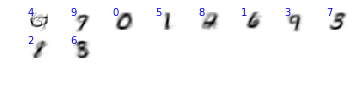

In [6]:
importlib.reload(clustering)
import numpy as np

finalObj = []
no_of_iterations_list = []

for rep in range(10):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 10, 'ffh')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    no_of_iterations_list.append(len(obj))

print("finalObjmean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

util.drawDigits(mu, arange(10))

Iteration 0, objective=0.49086331859865356
Iteration 1, objective=0.46522860677405525
Iteration 2, objective=0.45532360253740867
Iteration 3, objective=0.44842960796011994
Iteration 4, objective=0.44572793456853943
Iteration 5, objective=0.44415756753519
Iteration 6, objective=0.44189732679167726
Iteration 7, objective=0.43924759088458715
Iteration 8, objective=0.4370123850588574
Iteration 9, objective=0.4352128126156562
Iteration 10, objective=0.4341458307916766
Iteration 11, objective=0.43389797413237585
Iteration 12, objective=0.4338388692744429
Iteration 13, objective=0.4338015575853639
Iteration 14, objective=0.43379132042525215
Iteration 15, objective=0.43379132042525215
Iteration 0, objective=0.48369175911221085
Iteration 1, objective=0.45884875321602475
Iteration 2, objective=0.4488388257938547
Iteration 3, objective=0.44398264054618997
Iteration 4, objective=0.4411559302747636
Iteration 5, objective=0.43954825577557505
Iteration 6, objective=0.4383829342131464
Iteration 7, obj

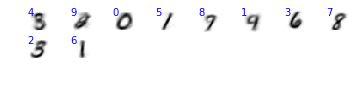

In [44]:
importlib.reload(clustering)
import numpy as np

finalObj = []
mu_list = []
no_of_iterations_list = []

for rep in range(10):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 10, 'ffh')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    mu_list.append(mu)
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

minFinalObjIndex = np.argmin(finalObj)
print("")
print("Lowest final objective: ",finalObj[minFinalObjIndex])
print("Plotting the digits with lowest final objective")
print("")
util.drawDigits(mu_list[minFinalObjIndex], arange(10))

Iteration 0, objective=0.48381226068860866
Iteration 1, objective=0.4591520680775249
Iteration 2, objective=0.45239842084049187
Iteration 3, objective=0.4482206820659628
Iteration 4, objective=0.44587306821642514
Iteration 5, objective=0.44484132601758786
Iteration 6, objective=0.44402705070921733
Iteration 7, objective=0.44376675161176027
Iteration 8, objective=0.44365859624351583
Iteration 9, objective=0.4434695729076083
Iteration 10, objective=0.44341572883780755
Iteration 11, objective=0.44337741165462885
Iteration 12, objective=0.44334796661317466
Iteration 13, objective=0.44328564998481546
Iteration 14, objective=0.4432157881258871
Iteration 15, objective=0.44308030731485154
Iteration 16, objective=0.4430424687165351
Iteration 17, objective=0.4430256681630123
Iteration 18, objective=0.44300870861884023
Iteration 19, objective=0.44300870861884023
Iteration 0, objective=0.5093288297414574
Iteration 1, objective=0.47418849388257023
Iteration 2, objective=0.4634912201295037
Iteration

Iteration 5, objective=0.4385149276303788
Iteration 6, objective=0.4381872383123833
Iteration 7, objective=0.4379189648400975
Iteration 8, objective=0.43758834052104073
Iteration 9, objective=0.43710919403208487
Iteration 10, objective=0.4367874843012457
Iteration 11, objective=0.4365856793308768
Iteration 12, objective=0.43644474914258957
Iteration 13, objective=0.436334419281256
Iteration 14, objective=0.4362300195248258
Iteration 15, objective=0.4361385055969757
Iteration 16, objective=0.43609715851071734
Iteration 17, objective=0.43607072335020053
Iteration 18, objective=0.43603137714440976
Iteration 19, objective=0.43601935034462075
Iteration 20, objective=0.43600226760652255
Iteration 21, objective=0.43600226760652255
Iteration 0, objective=0.4844076136708707
Iteration 1, objective=0.4622969251144895
Iteration 2, objective=0.4565629286333418
Iteration 3, objective=0.45247224262268093
Iteration 4, objective=0.4495592307369049
Iteration 5, objective=0.4476226969696324
Iteration 6, 

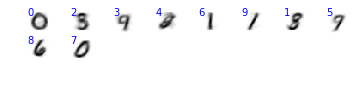

In [45]:
importlib.reload(clustering)
import numpy as np

finalObj = []
mu_list = []
no_of_iterations_list = []

for rep in range(10):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 10, 'random')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    mu_list.append(mu)
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

minFinalObjIndex = np.argmin(finalObj)
print("")
print("Lowest final objective: ",finalObj[minFinalObjIndex])
print("Plotting the digits with lowest final objective")
print("")
util.drawDigits(mu_list[minFinalObjIndex], arange(10))

[your WU6 answer here]:
On an average, it takes 18 iterations for kmeans to converge using ffh. Yes, the resulting cluster means look like digits for most of these runs. The plot of digits are shown in the execution result. From the below digits plot, 7 digits seems to be represented using ‘ffh’. Digits 4 and 5 seems to be missing.
On an average, it takes 25 iterations for kmeans to converge using random initialization and 18 iterations using ffh.

Final objective mean for ‘ffh’:  0.43633361849744795
average_no_of_iterations for ‘ffh’:  18.3

Lowest final objective for ‘ffh’:  0.43379132042525215
 
Final objective mean for ‘random’:  0.43812563793218773
average_no_of_iterations for ‘random’:  25.0

Lowest final objective for ‘random’:  0.43411661638259985


<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU7 (10%)
Repeat WU6, but for k=25.  Pick the best of 5 runs, and
plot the digits.  Are you able to see all digits here?

Iteration 0, objective=0.3957193068311177
Iteration 1, objective=0.3732388314706706
Iteration 2, objective=0.3675874305949783
Iteration 3, objective=0.3661092513264912
Iteration 4, objective=0.3651159978202249
Iteration 5, objective=0.36479272002962626
Iteration 6, objective=0.36465335122640186
Iteration 7, objective=0.36450404961282434
Iteration 8, objective=0.3644812104884102
Iteration 9, objective=0.36442238333601673
Iteration 10, objective=0.36442238333601673
Iteration 0, objective=0.43313957971209993
Iteration 1, objective=0.3943483405012671
Iteration 2, objective=0.3779601413062955
Iteration 3, objective=0.3720739141300971
Iteration 4, objective=0.36992472217709227
Iteration 5, objective=0.36817758915490795
Iteration 6, objective=0.36734520829385053
Iteration 7, objective=0.3666832968759819
Iteration 8, objective=0.3664498689798847
Iteration 9, objective=0.3662862990784454
Iteration 10, objective=0.3661127804735037
Iteration 11, objective=0.3660520756671734
Iteration 12, objectiv

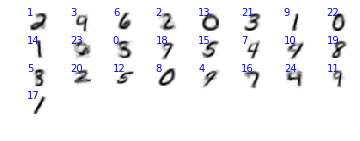

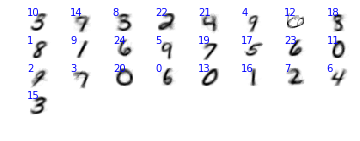

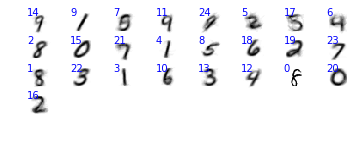

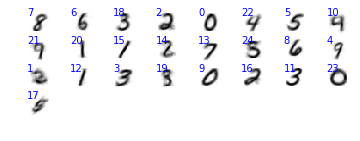

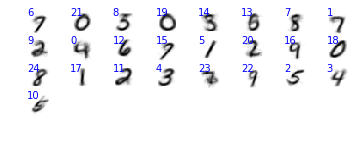

In [46]:
importlib.reload(clustering)
import numpy as np

finalObj = []
mu_list = []
no_of_iterations_list = []

for rep in range(10):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 25, 'random')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    mu_list.append(mu)
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

sortedFinalObjIndices = np.argsort(np.array(finalObj))
minFiveFinalObjIndices = sortedFinalObjIndices[:5]
print("")
print("Plotting the digits with five lowest final objectives.")

for i, minFinalObjIndex in enumerate(minFiveFinalObjIndices):
    print("")
    print("Minimum ",i+1," final objective: ",finalObj[minFinalObjIndex])
    
    print("")
    util.drawDigits(mu_list[minFinalObjIndex], arange(25))
    

Iteration 0, objective=0.4272854690340384
Iteration 1, objective=0.38883468823106276
Iteration 2, objective=0.3824370994159829
Iteration 3, objective=0.37807608074293886
Iteration 4, objective=0.37450785482968224
Iteration 5, objective=0.3730064321030332
Iteration 6, objective=0.37167251756284797
Iteration 7, objective=0.37053551829106346
Iteration 8, objective=0.369697888492324
Iteration 9, objective=0.3688629897054872
Iteration 10, objective=0.3674920584344195
Iteration 11, objective=0.36691667449118753
Iteration 12, objective=0.36674014751997136
Iteration 13, objective=0.3664746414791568
Iteration 14, objective=0.36626181528640506
Iteration 15, objective=0.36619911463715943
Iteration 16, objective=0.36617294982267395
Iteration 17, objective=0.366156938382665
Iteration 18, objective=0.36613411972911264
Iteration 19, objective=0.3661141839659727
Iteration 20, objective=0.3661141839659727
Iteration 0, objective=0.4245079230712664
Iteration 1, objective=0.3943952160840288
Iteration 2, o


Minimum  5  final objective:  0.37052082930744945



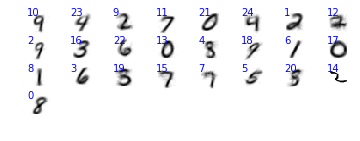

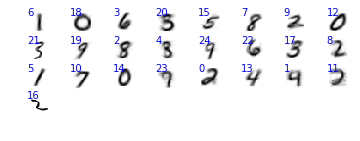

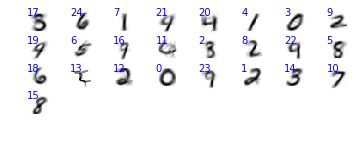

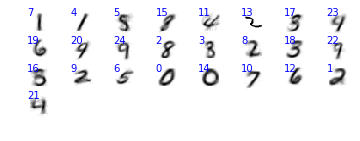

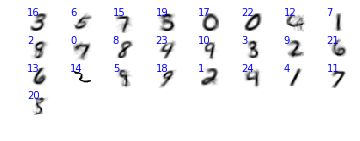

In [47]:
finalObj = []
mu_list = []
no_of_iterations_list = []

for rep in range(10):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 25, 'ffh')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    mu_list.append(mu)
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

sortedFinalObjIndices = np.argsort(np.array(finalObj))
minFiveFinalObjIndices = sortedFinalObjIndices[:5]
print("")
print("Plotting the digits with five lowest final objectives.")

for i, minFinalObjIndex in enumerate(minFiveFinalObjIndices):
    print("")
    print("Minimum ",i+1," final objective: ",finalObj[minFinalObjIndex])
    
    print("")
    util.drawDigits(mu_list[minFinalObjIndex], arange(25))
    

[WU7 Answer]:

Yes, the resulting cluster means look like digits for most of these runs. 
The plot of digits are shown in the execution result. 

On an average, it takes 15 iterations for kmeans to converge using random initialization and 18 iterations using ffh when k =25.

All 9 digits are represented using ‘ffh’ and random initialization when k =25. 


Output for random initialization using K=25:

Final objective mean:  0.3639924272797764
average_no_of_iterations:  15.7


Plotting the digits with five lowest final objectives.

Minimum  1  final objective:  0.36201775821137633


Minimum  2  final objective:  0.3621776144920685


Minimum  3  final objective:  0.36319782954208035


Minimum  4  final objective:  0.36334602981799946


Minimum  5  final objective:  0.36345137856130283


Output for ffh using k = 25:

Final objective mean:  0.3702192329232126
average_no_of_iterations:  18.4

Plotting the digits with five lowest final objectives.

Minimum  1  final objective:  0.3636247117618071


Minimum  2  final objective:  0.3661141839659727


Minimum  3  final objective:  0.3690519481636169


Minimum  4  final objective:  0.36936299537526424


Minimum  5  final objective:  0.37052082930744945



Finally, implement the kmeans++ heuristic. Here is some output:

In [48]:
importlib.reload(clustering)

finalObj = []
for rep in range(20):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 10, 'km++')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
#(lots of output)

np.mean(finalObj)
#0.4392510535744174
# util.drawDigits(mu, arange(10))

Iteration 0, objective=0.4901889622865705
Iteration 1, objective=0.4682796655867017
Iteration 2, objective=0.46149835355613145
Iteration 3, objective=0.45625495634161845
Iteration 4, objective=0.4535137333484934
Iteration 5, objective=0.4508149801509714
Iteration 6, objective=0.4485855266738972
Iteration 7, objective=0.44760876489612866
Iteration 8, objective=0.4468281859704384
Iteration 9, objective=0.4463704267251387
Iteration 10, objective=0.4457889086377436
Iteration 11, objective=0.4451868332131806
Iteration 12, objective=0.4444926857359259
Iteration 13, objective=0.44389700799635873
Iteration 14, objective=0.4435509205256509
Iteration 15, objective=0.44332771917630565
Iteration 16, objective=0.4431536507337509
Iteration 17, objective=0.44311444557132507
Iteration 18, objective=0.4430732454757899
Iteration 19, objective=0.4430416456070209
Iteration 20, objective=0.4430416456070209
Iteration 0, objective=0.4890598232102341
Iteration 1, objective=0.46400443527110347
Iteration 2, obj

Iteration 10, objective=0.4388443569952219
Iteration 11, objective=0.4386116983166372
Iteration 12, objective=0.4385274083877014
Iteration 13, objective=0.4384206749301469
Iteration 14, objective=0.4383169515742993
Iteration 15, objective=0.4382235346459698
Iteration 16, objective=0.43815950115879215
Iteration 17, objective=0.43813538847780825
Iteration 18, objective=0.43813538847780825
Iteration 0, objective=0.4832232763135696
Iteration 1, objective=0.46101121233393627
Iteration 2, objective=0.4494508030945085
Iteration 3, objective=0.444375652093495
Iteration 4, objective=0.44127563216940946
Iteration 5, objective=0.4395029831642553
Iteration 6, objective=0.4385537744231804
Iteration 7, objective=0.4383117905980536
Iteration 8, objective=0.4381880593619847
Iteration 9, objective=0.438103131460753
Iteration 10, objective=0.438080786193147
Iteration 11, objective=0.438080786193147
Iteration 0, objective=0.49565880533478995
Iteration 1, objective=0.4619018859591243
Iteration 2, objectiv

Iteration 17, objective=0.440739999157845
Iteration 18, objective=0.4407282544468895
Iteration 19, objective=0.4407282544468895
Iteration 0, objective=0.48587740866103796
Iteration 1, objective=0.46039578208876347
Iteration 2, objective=0.4527830652177462
Iteration 3, objective=0.4483877626732791
Iteration 4, objective=0.4441963744522818
Iteration 5, objective=0.44060294068226197
Iteration 6, objective=0.43841244156851955
Iteration 7, objective=0.4376790676036008
Iteration 8, objective=0.43737857367789046
Iteration 9, objective=0.4371521942216186
Iteration 10, objective=0.4369510296827949
Iteration 11, objective=0.43676081140916606
Iteration 12, objective=0.43654581503400725
Iteration 13, objective=0.43641541958413105
Iteration 14, objective=0.4362997584482081
Iteration 15, objective=0.4362884694674455
Iteration 16, objective=0.4362884694674455
Iteration 0, objective=0.48504159660737606
Iteration 1, objective=0.4682806241462674
Iteration 2, objective=0.4612988103556788
Iteration 3, obj

0.43844646050959285

<img src="kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>
## WU8 (10%)
Compare vanilla kmeans (with random initialization) to ffh to km++ for (a) 
    a small number of clusters (say, 2 or 3) and (b) a large number of clusters (say 25). 
    Do you see a big difference in performance at either end?

Iteration 0, objective=0.5738639618052741
Iteration 1, objective=0.5690320318122487
Iteration 2, objective=0.5683375760432496
Iteration 3, objective=0.567840468818423
Iteration 4, objective=0.5669077734973063
Iteration 5, objective=0.565847387012923
Iteration 6, objective=0.5650522806905934
Iteration 7, objective=0.56430482469507
Iteration 8, objective=0.5636513571545652
Iteration 9, objective=0.5634076738701821
Iteration 10, objective=0.5632709166387548
Iteration 11, objective=0.5632432642667923
Iteration 12, objective=0.5631943449941195
Iteration 13, objective=0.5631469115416684
Iteration 14, objective=0.563143626494683
Iteration 15, objective=0.5631411509442309
Iteration 16, objective=0.5631367329189557
Iteration 17, objective=0.5631340072951709
Iteration 18, objective=0.5631340072951709
Iteration 0, objective=0.5748240467743494
Iteration 1, objective=0.5689327711353247
Iteration 2, objective=0.5677576308951026
Iteration 3, objective=0.5672057666692313
Iteration 4, objective=0.56668

Iteration 2, objective=0.5637367981614938
Iteration 3, objective=0.5632589103523267
Iteration 4, objective=0.5630035125086461
Iteration 5, objective=0.5627839710968678
Iteration 6, objective=0.5626486130535284
Iteration 7, objective=0.56257785741344
Iteration 8, objective=0.5625674326802993
Iteration 9, objective=0.5625645159559713
Iteration 10, objective=0.5625608513203285
Iteration 11, objective=0.5625608513203285
Iteration 0, objective=0.5841680900295221
Iteration 1, objective=0.5769803537705084
Iteration 2, objective=0.5744012537003561
Iteration 3, objective=0.5729254897861207
Iteration 4, objective=0.5721145440291854
Iteration 5, objective=0.5713217034339757
Iteration 6, objective=0.5697652348275172
Iteration 7, objective=0.568518947685139
Iteration 8, objective=0.567462886253316
Iteration 9, objective=0.5666058577067826
Iteration 10, objective=0.566047114263693
Iteration 11, objective=0.5655609794533469
Iteration 12, objective=0.5649847232219146
Iteration 13, objective=0.56478253

Iteration 7, objective=0.5625566729756173
Iteration 0, objective=0.5730422680802725
Iteration 1, objective=0.5647164039213312
Iteration 2, objective=0.5630606488903439
Iteration 3, objective=0.5626278300235109
Iteration 4, objective=0.5625932562212296
Iteration 5, objective=0.5625539198211138
Iteration 6, objective=0.562544960652813
Iteration 7, objective=0.562544960652813
Iteration 0, objective=0.5889379463656288
Iteration 1, objective=0.5774990012635058
Iteration 2, objective=0.5725307633217362
Iteration 3, objective=0.5690388014526665
Iteration 4, objective=0.5677661517977075
Iteration 5, objective=0.5672656228429908
Iteration 6, objective=0.5670251040623516
Iteration 7, objective=0.5668748817347018
Iteration 8, objective=0.5666009248475454
Iteration 9, objective=0.5662575795975522
Iteration 10, objective=0.5659160099607446
Iteration 11, objective=0.5653472795139988
Iteration 12, objective=0.5648360629051858
Iteration 13, objective=0.5645995302765159
Iteration 14, objective=0.564374

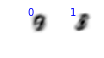

In [49]:
#[WU8 code here]

importlib.reload(clustering)

finalObj = []
no_of_iterations_list =[]
for rep in range(20):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 2, 'random')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)
util.drawDigits(mu, arange(2))

Iteration 0, objective=0.5704599859523034
Iteration 1, objective=0.5658027369476171
Iteration 2, objective=0.5650630235082618
Iteration 3, objective=0.5648044888080597
Iteration 4, objective=0.5646842042395901
Iteration 5, objective=0.5646571579072397
Iteration 6, objective=0.5646478474075883
Iteration 7, objective=0.5646385724387178
Iteration 8, objective=0.5646308687920399
Iteration 9, objective=0.5646308687920399
Iteration 0, objective=0.5748469298729688
Iteration 1, objective=0.5681284044422972
Iteration 2, objective=0.5658860265007242
Iteration 3, objective=0.564920265601227
Iteration 4, objective=0.5645865227576616
Iteration 5, objective=0.564418807137105
Iteration 6, objective=0.5642464968005394
Iteration 7, objective=0.5641143342627543
Iteration 8, objective=0.5639872818221203
Iteration 9, objective=0.563875530117037
Iteration 10, objective=0.563757889251799
Iteration 11, objective=0.5636456985961407
Iteration 12, objective=0.5635633277876149
Iteration 13, objective=0.563381734

Iteration 17, objective=0.564322151627504
Iteration 18, objective=0.564275394638505
Iteration 19, objective=0.5642569999083638
Iteration 20, objective=0.564217266972516
Iteration 21, objective=0.5641169051008774
Iteration 22, objective=0.5639566604123694
Iteration 23, objective=0.5637918605022528
Iteration 24, objective=0.5636663155137395
Iteration 25, objective=0.5635659713372023
Iteration 26, objective=0.5634137749211812
Iteration 27, objective=0.5632739147926615
Iteration 28, objective=0.5631854057175446
Iteration 29, objective=0.563121117470513
Iteration 30, objective=0.5630345735025012
Iteration 31, objective=0.5629301993137171
Iteration 32, objective=0.562803449347786
Iteration 33, objective=0.5626115631150319
Iteration 34, objective=0.5625171846188735
Iteration 35, objective=0.5624718565142058
Iteration 36, objective=0.5624302293330742
Iteration 37, objective=0.5624121723746027
Iteration 38, objective=0.5623994363648008
Iteration 39, objective=0.562389412472063
Iteration 40, obj

Iteration 7, objective=0.5647371617157871
Iteration 8, objective=0.5647235920600696
Iteration 9, objective=0.5647130732560568
Iteration 10, objective=0.5647130732560568
Iteration 0, objective=0.5830660231420505
Iteration 1, objective=0.5758999244511583
Iteration 2, objective=0.5712973938684249
Iteration 3, objective=0.5676566261343088
Iteration 4, objective=0.5655642005143715
Iteration 5, objective=0.5649242085157792
Iteration 6, objective=0.5645458068894909
Iteration 7, objective=0.5643193275537718
Iteration 8, objective=0.5642285426714789
Iteration 9, objective=0.5641435259901145
Iteration 10, objective=0.564036736317818
Iteration 11, objective=0.5639175753189163
Iteration 12, objective=0.5638014369180595
Iteration 13, objective=0.5636911344286264
Iteration 14, objective=0.5635264412129338
Iteration 15, objective=0.5633758220204592
Iteration 16, objective=0.5633287133512925
Iteration 17, objective=0.5632746307677567
Iteration 18, objective=0.563215532351317
Iteration 19, objective=0.

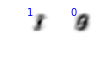

In [50]:
importlib.reload(clustering)

finalObj = [] = []
no_of_iterations_list = []
for rep in range(20):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 2, 'ffh')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

util.drawDigits(mu, arange(2))

Iteration 0, objective=0.5771467211525259
Iteration 1, objective=0.5697559867170768
Iteration 2, objective=0.5670689383317723
Iteration 3, objective=0.5664471918537555
Iteration 4, objective=0.5660136807954785
Iteration 5, objective=0.56554606679589
Iteration 6, objective=0.5650952736714813
Iteration 7, objective=0.5647387055811144
Iteration 8, objective=0.5646473601303391
Iteration 9, objective=0.5646334261495968
Iteration 10, objective=0.56462974837883
Iteration 11, objective=0.56462974837883
Iteration 0, objective=0.5814321693769502
Iteration 1, objective=0.5741862229032012
Iteration 2, objective=0.5703337001531217
Iteration 3, objective=0.5677931782529965
Iteration 4, objective=0.5666436593437365
Iteration 5, objective=0.5658694550614422
Iteration 6, objective=0.5653172146637657
Iteration 7, objective=0.5646465946529247
Iteration 8, objective=0.5642164701684524
Iteration 9, objective=0.5639167283827827
Iteration 10, objective=0.563757230993545
Iteration 11, objective=0.563657869814

Iteration 0, objective=0.5842008943454989
Iteration 1, objective=0.5762632912559386
Iteration 2, objective=0.5724340427849376
Iteration 3, objective=0.5687837000153384
Iteration 4, objective=0.5656816419470371
Iteration 5, objective=0.5640522637995558
Iteration 6, objective=0.5636117457394862
Iteration 7, objective=0.5634323536256071
Iteration 8, objective=0.5632790626381394
Iteration 9, objective=0.5631201216911892
Iteration 10, objective=0.5630238051760225
Iteration 11, objective=0.5628284530835388
Iteration 12, objective=0.5626163830323757
Iteration 13, objective=0.5625301184519763
Iteration 14, objective=0.5625003427178411
Iteration 15, objective=0.562476331372244
Iteration 16, objective=0.5624535988667985
Iteration 17, objective=0.5624207993230859
Iteration 18, objective=0.5623820768888123
Iteration 19, objective=0.5623652886983782
Iteration 20, objective=0.5623652886983782
Iteration 0, objective=0.5817166311967126
Iteration 1, objective=0.5730678295552316
Iteration 2, objective=0

Iteration 10, objective=0.5629109293433886
Iteration 11, objective=0.5625913485575758
Iteration 12, objective=0.5624707242550884
Iteration 13, objective=0.5624438985928465
Iteration 14, objective=0.5624234026720539
Iteration 15, objective=0.562396653315069
Iteration 16, objective=0.5623922409544835
Iteration 17, objective=0.5623891719358142
Iteration 18, objective=0.5623891719358142
Iteration 0, objective=0.5748353483317311
Iteration 1, objective=0.5682939544132558
Iteration 2, objective=0.5666129352527884
Iteration 3, objective=0.5657763286628726
Iteration 4, objective=0.5652195284977918
Iteration 5, objective=0.5650356285183755
Iteration 6, objective=0.5648859108012896
Iteration 7, objective=0.5648107721262282
Iteration 8, objective=0.5647732750843371
Iteration 9, objective=0.5647602175207378
Iteration 10, objective=0.5647496744330911
Iteration 11, objective=0.5647388661721046
Iteration 12, objective=0.564713876400088
Iteration 13, objective=0.564713876400088

Final objective mean:  

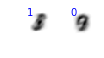

In [51]:
importlib.reload(clustering)

finalObj = []
no_of_iterations_list = []
for rep in range(20):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 2, 'km++')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

util.drawDigits(mu, arange(2))

Iteration 0, objective=0.3957193068311177
Iteration 1, objective=0.3732388314706706
Iteration 2, objective=0.3675874305949783
Iteration 3, objective=0.3661092513264912
Iteration 4, objective=0.3651159978202249
Iteration 5, objective=0.36479272002962626
Iteration 6, objective=0.36465335122640186
Iteration 7, objective=0.36450404961282434
Iteration 8, objective=0.3644812104884102
Iteration 9, objective=0.36442238333601673
Iteration 10, objective=0.36442238333601673
Iteration 0, objective=0.43313957971209993
Iteration 1, objective=0.3943483405012671
Iteration 2, objective=0.3779601413062955
Iteration 3, objective=0.3720739141300971
Iteration 4, objective=0.36992472217709227
Iteration 5, objective=0.36817758915490795
Iteration 6, objective=0.36734520829385053
Iteration 7, objective=0.3666832968759819
Iteration 8, objective=0.3664498689798847
Iteration 9, objective=0.3662862990784454
Iteration 10, objective=0.3661127804735037
Iteration 11, objective=0.3660520756671734
Iteration 12, objectiv

Iteration 23, objective=0.36205639451510546
Iteration 24, objective=0.36201953765678724
Iteration 25, objective=0.3619783090374344
Iteration 26, objective=0.36194273055431564
Iteration 27, objective=0.3619164065846
Iteration 28, objective=0.3619164065846
Iteration 0, objective=0.419645760901547
Iteration 1, objective=0.38537017289093944
Iteration 2, objective=0.37650237840353923
Iteration 3, objective=0.372357541610663
Iteration 4, objective=0.3696183931283715
Iteration 5, objective=0.3676781682113266
Iteration 6, objective=0.36624449764292283
Iteration 7, objective=0.3651576967776063
Iteration 8, objective=0.3639805778698003
Iteration 9, objective=0.363128266686929
Iteration 10, objective=0.36254132126150773
Iteration 11, objective=0.36231441935656095
Iteration 12, objective=0.36214421034731326
Iteration 13, objective=0.36206710472675896
Iteration 14, objective=0.36198790120535385
Iteration 15, objective=0.36190219226240394
Iteration 16, objective=0.36179955805842245
Iteration 17, obj

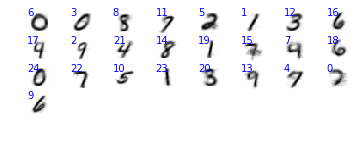

In [52]:
importlib.reload(clustering)

finalObj = []
no_of_iterations_list = []
for rep in range(20):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 25, 'random')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

util.drawDigits(mu, arange(25))

Iteration 0, objective=0.4272854690340384
Iteration 1, objective=0.38883468823106276
Iteration 2, objective=0.3824370994159829
Iteration 3, objective=0.37807608074293886
Iteration 4, objective=0.37450785482968224
Iteration 5, objective=0.3730064321030332
Iteration 6, objective=0.37167251756284797
Iteration 7, objective=0.37053551829106346
Iteration 8, objective=0.369697888492324
Iteration 9, objective=0.3688629897054872
Iteration 10, objective=0.3674920584344195
Iteration 11, objective=0.36691667449118753
Iteration 12, objective=0.36674014751997136
Iteration 13, objective=0.3664746414791568
Iteration 14, objective=0.36626181528640506
Iteration 15, objective=0.36619911463715943
Iteration 16, objective=0.36617294982267395
Iteration 17, objective=0.366156938382665
Iteration 18, objective=0.36613411972911264
Iteration 19, objective=0.3661141839659727
Iteration 20, objective=0.3661141839659727
Iteration 0, objective=0.4245079230712664
Iteration 1, objective=0.3943952160840288
Iteration 2, o

Iteration 7, objective=0.37646455541405827
Iteration 8, objective=0.37491398196860537
Iteration 9, objective=0.37428415207994936
Iteration 10, objective=0.37359010043771135
Iteration 11, objective=0.3729924574615832
Iteration 12, objective=0.3724480809557879
Iteration 13, objective=0.37201362916556807
Iteration 14, objective=0.3717064120562625
Iteration 15, objective=0.37138612048835434
Iteration 16, objective=0.3712252925160474
Iteration 17, objective=0.3707978469588916
Iteration 18, objective=0.3702858722453235
Iteration 19, objective=0.37006774876716686
Iteration 20, objective=0.3698721050767346
Iteration 21, objective=0.3697645453282023
Iteration 22, objective=0.36965560485826154
Iteration 23, objective=0.36957763948580985
Iteration 24, objective=0.36955773016309074
Iteration 25, objective=0.36955773016309074
Iteration 0, objective=0.43003828814823936
Iteration 1, objective=0.4033036454573732
Iteration 2, objective=0.38961142048195246
Iteration 3, objective=0.38328440478515363
Iter

Iteration 0, objective=0.4280736696585902
Iteration 1, objective=0.4037382930498738
Iteration 2, objective=0.39464548872254235
Iteration 3, objective=0.38571419460386946
Iteration 4, objective=0.3787256483226453
Iteration 5, objective=0.37623442040502003
Iteration 6, objective=0.374546703818345
Iteration 7, objective=0.3729308361675037
Iteration 8, objective=0.3716514812404927
Iteration 9, objective=0.3706284375553886
Iteration 10, objective=0.3701907985059146
Iteration 11, objective=0.3698326575086857
Iteration 12, objective=0.3695514118739186
Iteration 13, objective=0.36931316004858716
Iteration 14, objective=0.36909289226934583
Iteration 15, objective=0.3685523404374444
Iteration 16, objective=0.3679727861585094
Iteration 17, objective=0.3677834622240709
Iteration 18, objective=0.3676792120695121
Iteration 19, objective=0.3676172161244046
Iteration 20, objective=0.3676172161244046

Final objective mean:  0.36948892950486434
average_no_of_iterations:  20.15


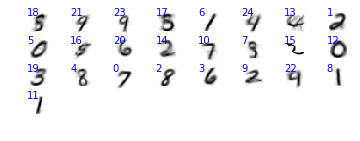

In [53]:
importlib.reload(clustering)

finalObj = []
no_of_iterations_list = []
for rep in range(20):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 25, 'ffh')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

util.drawDigits(mu, arange(25))

Iteration 0, objective=0.40339431689508093
Iteration 1, objective=0.3797390084928419
Iteration 2, objective=0.36957672384281726
Iteration 3, objective=0.3668471102744285
Iteration 4, objective=0.36566822483443323
Iteration 5, objective=0.36478647081754956
Iteration 6, objective=0.3638406706760105
Iteration 7, objective=0.3630218373662978
Iteration 8, objective=0.36267530909479767
Iteration 9, objective=0.3624061574128527
Iteration 10, objective=0.36213624712211784
Iteration 11, objective=0.3619419997397888
Iteration 12, objective=0.3618584151868758
Iteration 13, objective=0.36158891197656584
Iteration 14, objective=0.36142173492129365
Iteration 15, objective=0.36142173492129365
Iteration 0, objective=0.4229822833515687
Iteration 1, objective=0.3873311657531096
Iteration 2, objective=0.37313192884255514
Iteration 3, objective=0.368348314005618
Iteration 4, objective=0.36597561172733645
Iteration 5, objective=0.36477634730695274
Iteration 6, objective=0.36417385328314417
Iteration 7, obj

Iteration 13, objective=0.3625379388999964
Iteration 0, objective=0.4158695118014679
Iteration 1, objective=0.38789014439842906
Iteration 2, objective=0.37979105899587223
Iteration 3, objective=0.3753381200398329
Iteration 4, objective=0.3716439828321477
Iteration 5, objective=0.36939410253507177
Iteration 6, objective=0.36807578247692346
Iteration 7, objective=0.36755982671717813
Iteration 8, objective=0.3672788148838721
Iteration 9, objective=0.3669963830730209
Iteration 10, objective=0.36688471396025385
Iteration 11, objective=0.36678493933982115
Iteration 12, objective=0.3666601047890143
Iteration 13, objective=0.36660483969877244
Iteration 14, objective=0.36658044134333384
Iteration 15, objective=0.36658044134333384
Iteration 0, objective=0.4133104085554805
Iteration 1, objective=0.3856000663206025
Iteration 2, objective=0.375869397640626
Iteration 3, objective=0.37142124801002047
Iteration 4, objective=0.36814676341135877
Iteration 5, objective=0.3658554796716263
Iteration 6, obj

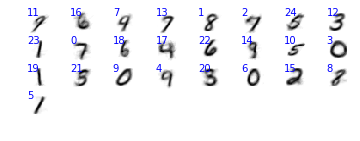

In [54]:
importlib.reload(clustering)

finalObj = []
no_of_iterations_list = []
for rep in range(20):
    np.random.seed(1234 + rep)
    mu0 = clustering.initialize_clusters(X, 25, 'km++')
    (mu,z,obj) = clustering.kmeans(X, mu0, doPlot=False)
    finalObj.append(obj[-1])
    no_of_iterations_list.append(len(obj))

print("")
print("Final objective mean: ",np.mean(finalObj))
average_no_of_iterations = sum(no_of_iterations_list) / float(len(no_of_iterations_list))
print("average_no_of_iterations: ",average_no_of_iterations)

util.drawDigits(mu, arange(25))

[WU8 answer]:

Output for random initialization with k =2:

Final objective mean:  0.5628946537334514
average_no_of_iterations:  23.15

Output for ffh with k =2:

Final objective mean:  0.563113643722361
average_no_of_iterations:  23.2

Output for km++ with k =2:

Final objective mean:  0.5630648800144982
average_no_of_iterations:  20.75

Output for random initialization with k =25:

Final objective mean:  0.36449740548411813
average_no_of_iterations:  16.5

Output for ffh with k =25:

Final objective mean:  0.36948892950486434
average_no_of_iterations:  20.15

Output for km++ with k =25:

Final objective mean:  0.3635481623217721
average_no_of_iterations:  16.15


There is not much difference in performance with respect to final objective mean at either end. In both the settings that is for k = 2 and k =5, the objective mean in all three cases random, ffh and km++ are very similar.

But with respect to number of iterations or execution time, km++ mostly takes less number of iterations to converge as compared to random initialization and ffh.
